In [1]:
import pandas as pd

file_path = '/content/depression_data.csv'
data = pd.read_csv(file_path)

data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

(None,
                Name  Age Marital Status    Education Level  \
 0  Christine Barker   31        Married  Bachelor's Degree   
 1  Jacqueline Lewis   55        Married        High School   
 2    Shannon Church   78        Widowed    Master's Degree   
 3    Charles Jordan   58       Divorced    Master's Degree   
 4      Michael Rich   18         Single        High School   
 
    Number of Children Smoking Status Physical Activity Level  \
 0                   2     Non-smoker                  Active   
 1                   1     Non-smoker               Sedentary   
 2                   1     Non-smoker               Sedentary   
 3                   3     Non-smoker                Moderate   
 4                   0     Non-smoker               Sedentary   
 
   Employment Status     Income Alcohol Consumption Dietary Habits  \
 0        Unemployed   26265.67            Moderate       Moderate   
 1          Employed   42710.36                High      Unhealthy   
 2         

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Extract categorical and numerical columns
numerical_columns = ['Age', 'Number of Children', 'Income']
categorical_columns = [col for col in data.columns if col not in numerical_columns + ['Name']]

# Apply OneHotEncoding to categorical data and scaling to numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Preprocess the data
preprocessed_data = preprocessor.fit_transform(data.drop(columns=['Name']))

# Shape of the processed data
preprocessed_data.shape


(413768, 37)

In [3]:
!pip install MiniSom

from minisom import MiniSom

# Initialize the SOM parameters
x, y = 10, 10  # SOM grid size (10x10)
input_len = preprocessed_data.shape[1]  # Number of input features
som = MiniSom(x=x, y=y, input_len=input_len, sigma=1.0, learning_rate=0.5)

# Randomly initialize the weights
som.random_weights_init(preprocessed_data)

# Train the SOM for 100 iterations
som.train_random(preprocessed_data, 100)

# Get the distance map (for visualization purposes)
distance_map = som.distance_map()

distance_map


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=ea4a55df2122dfb9eaf6b980b8b7a13c20eea0e577eb4ff5e45ee4de581dcaa5
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


array([[0.23107546, 0.40318525, 0.41114731, 0.53601875, 0.56983078,
        0.60608992, 0.54639745, 0.6731043 , 0.70657819, 0.45477163],
       [0.42138216, 0.59658997, 0.77072551, 0.75679312, 0.87597952,
        0.91833153, 0.92636222, 0.91719721, 0.95718123, 0.63509584],
       [0.391933  , 0.66346286, 0.76317894, 0.88957308, 0.98132619,
        0.83932293, 0.76689182, 0.81827764, 0.79549693, 0.45224964],
       [0.42048543, 0.65444995, 0.76556004, 0.89831627, 0.91868837,
        0.69768224, 0.60068081, 0.63634162, 0.6814458 , 0.52896666],
       [0.35787774, 0.49795533, 0.62539395, 0.81446508, 0.71291027,
        0.64289407, 0.50404959, 0.51436295, 0.89114456, 0.54247157],
       [0.30405364, 0.4808669 , 0.55374   , 0.74946777, 0.61569082,
        0.69524359, 0.58843842, 0.69424165, 0.70118314, 0.60527285],
       [0.3860634 , 0.52389672, 0.53887231, 0.56770244, 0.634135  ,
        0.77350379, 0.9717666 , 0.76838747, 0.80962491, 0.53476873],
       [0.53827323, 0.71411096, 0.5561660

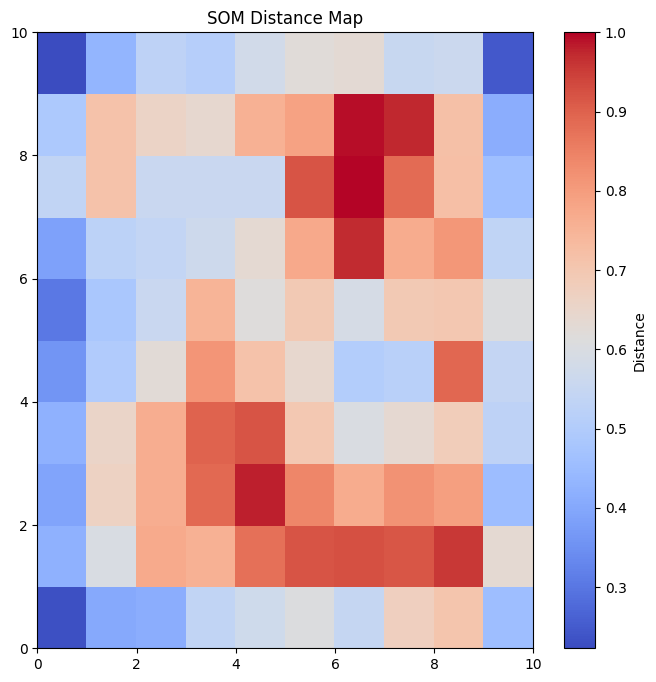

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the SOM distance map as a heatmap
plt.figure(figsize=(8, 8))
plt.pcolor(distance_map, cmap='coolwarm')  # Use a color map for visualization
plt.colorbar(label='Distance')
plt.title('SOM Distance Map')
plt.show()
